In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
tf.__version__

'2.11.0'

In [4]:
!nvidia-smi

Fri Mar  3 13:43:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
tf.keras.__version__

'2.11.0'

In [7]:
# mnist dataset application
mnist = tf.keras.datasets.mnist

In [8]:
 (X_train_full,y_train_full), (X_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [9]:
X_train_full.shape #60, 000 data points of 28*28 size images

(60000, 28, 28)

In [10]:
y_train_full.shape # 60 000 label of images

(60000,)

In [11]:
X_test.shape # 10 000 images with 28*28 image size

(10000, 28, 28)

In [12]:
y_test.shape # 10 000 label of images

(10000,)

In [13]:
img = X_train_full[0]
img # 28*28 pixels of 1. image


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

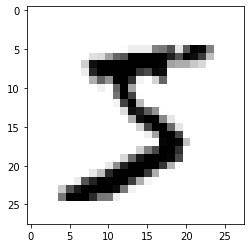

In [14]:
plt.imshow(img, cmap = 'binary')

<AxesSubplot:>

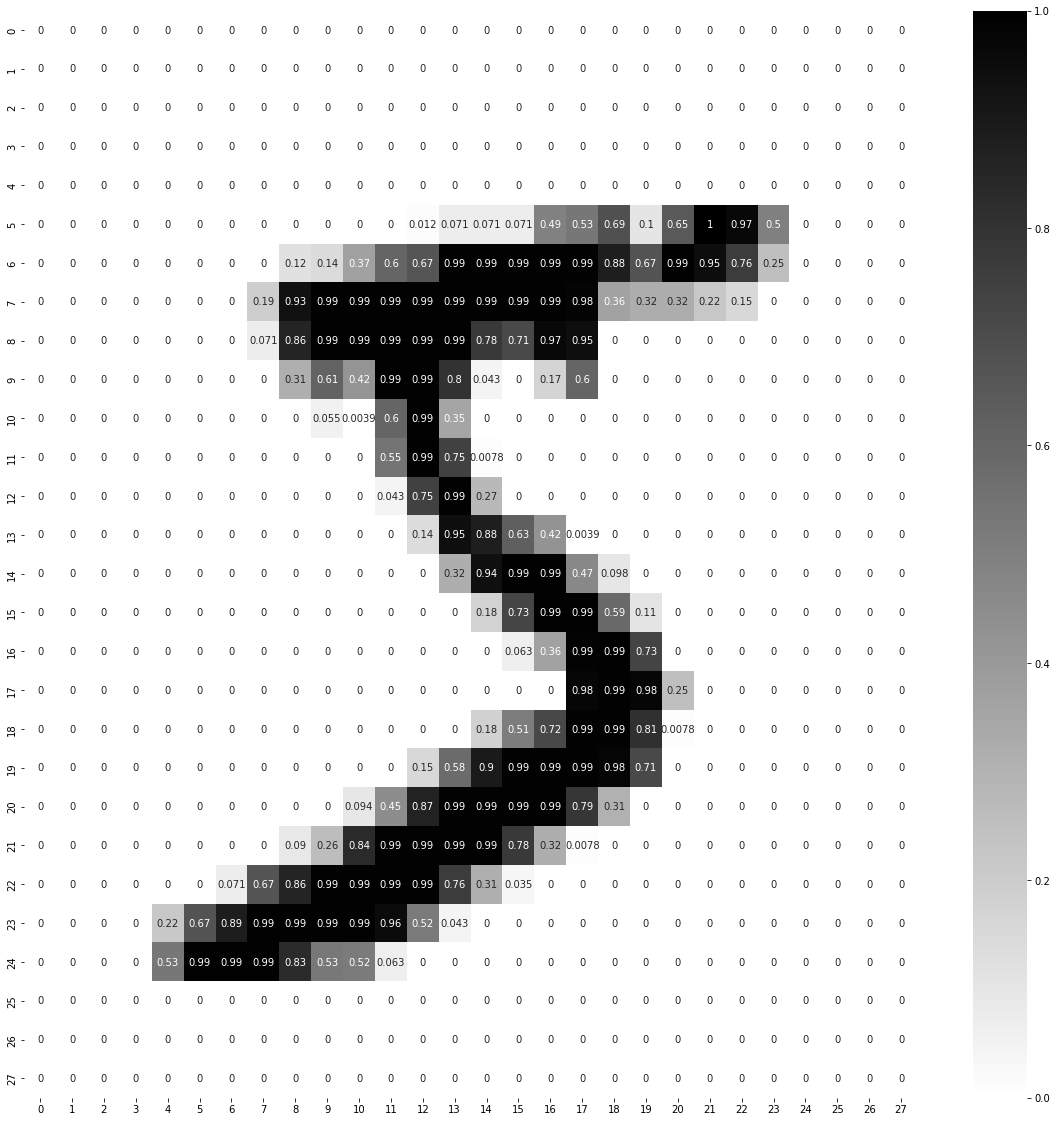

In [15]:
plt.figure(figsize = (20, 20))
sns.heatmap(img/255, annot= True, cmap = 'binary') # decimal values between 0 and 1 for pixel

In [16]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255 #solution will be faster by scaling between 0 and 1

In [17]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [18]:
X_test = X_test/255 #normalize test data as well

In [19]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
# flattening --> hidden layers --> hidden layers --> o/p
# flattening == 28*28*1 == 28*28*1 = 784
# Softmax aplication is for multiclass classification whereas sigmoid is for binary classification
CLASSES = 10 # that is why the ouput layers has 10 nodes/layers
LAYERS = [
    
    tf.keras.layers.Flatten(input_shape = (28,28), name = 'inputlayer'), 
    tf.keras.layers.Dense(300, activation = 'relu', name = 'hiddenLayer1'),
    tf.keras.layers.Dense(100, activation = 'relu', name = 'hiddenLayer2'),
    tf.keras.layers.Dense(CLASSES, activation = 'softmax', name = 'ouputLayer'),
]

In [21]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [22]:
model_clf.layers

In [23]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 ouputLayer (Dense)          (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
784*300 + 300  # 300 is the bias for the second layers between two
# 28*28 = 784

235500

In [25]:
300*100+100

30100

In [26]:
100*10 + 10

1010

In [27]:
# Total paramas = sum of the values above


In [28]:
model_clf.layers[1].name

'hiddenLayer1'

In [29]:
model_clf.layers[1].weights

[<tf.Variable 'hiddenLayer1/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.07169329, -0.05965428, -0.01887682, ...,  0.00309694,
          0.04707857, -0.06248877],
        [-0.03363927,  0.0550994 , -0.03385644, ...,  0.01804122,
          0.02315996, -0.02271146],
        [-0.0219507 ,  0.05236374, -0.02516682, ...,  0.00564303,
         -0.0644393 ,  0.01108057],
        ...,
        [-0.0393755 ,  0.00192419,  0.03146491, ...,  0.03682978,
         -0.02444213,  0.06987903],
        [-0.0590367 , -0.05556583,  0.01909971, ...,  0.06931014,
          0.02815682,  0.01394106],
        [ 0.00333685,  0.05039867, -0.02266073, ..., -0.02334004,
         -0.02358652, -0.01148953]], dtype=float32)>,
 <tf.Variable 'hiddenLayer1/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [30]:
model_clf.layers[1].get_weights()

[array([[ 0.07169329, -0.05965428, -0.01887682, ...,  0.00309694,
          0.04707857, -0.06248877],
        [-0.03363927,  0.0550994 , -0.03385644, ...,  0.01804122,
          0.02315996, -0.02271146],
        [-0.0219507 ,  0.05236374, -0.02516682, ...,  0.00564303,
         -0.0644393 ,  0.01108057],
        ...,
        [-0.0393755 ,  0.00192419,  0.03146491, ...,  0.03682978,
         -0.02444213,  0.06987903],
        [-0.0590367 , -0.05556583,  0.01909971, ...,  0.06931014,
          0.02815682,  0.01394106],
        [ 0.00333685,  0.05039867, -0.02266073, ..., -0.02334004,
         -0.02358652, -0.01148953]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [31]:
weights, biases = model_clf.layers[1].get_weights()

In [32]:
weights.shape

(784, 300)

In [33]:
biases.shape

(300,)

In [34]:
weights # initialized weights

array([[ 0.07169329, -0.05965428, -0.01887682, ...,  0.00309694,
         0.04707857, -0.06248877],
       [-0.03363927,  0.0550994 , -0.03385644, ...,  0.01804122,
         0.02315996, -0.02271146],
       [-0.0219507 ,  0.05236374, -0.02516682, ...,  0.00564303,
        -0.0644393 ,  0.01108057],
       ...,
       [-0.0393755 ,  0.00192419,  0.03146491, ...,  0.03682978,
        -0.02444213,  0.06987903],
       [-0.0590367 , -0.05556583,  0.01909971, ...,  0.06931014,
         0.02815682,  0.01394106],
       [ 0.00333685,  0.05039867, -0.02266073, ..., -0.02334004,
        -0.02358652, -0.01148953]], dtype=float32)

In [35]:
biases # initialized biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'SGD'
METRICS = ['accuracy']

In [37]:
model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In [38]:
EPOCHS = 30 
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, 
              epochs = EPOCHS,
                                                                                      
              validation_data = VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 17s 6ms/step - loss: 0.6027 - accuracy: 0.8466 - val_loss: 0.3051 - val_accuracy: 0.9140
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2896 - accuracy: 0.9171 - val_loss: 0.2498 - val_accuracy: 0.9298
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2386 - accuracy: 0.9317 - val_loss: 0.2099 - val_accuracy: 0.9430
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2052 - accuracy: 0.9411 - val_loss: 0.1838 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1801 - accuracy: 0.9484 - val_loss: 0.1595 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1596 - accuracy: 0.9549 - val_loss: 0.1462 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1430 - accuracy: 0.9593 - val_loss: 0.1340 - val_accuracy

In [48]:
plt.figure(figsize = (20, 20))
data = pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,0.602744,0.846636,0.305117,0.9140
1,0.289630,0.917145,0.249752,0.9298
2,0.238622,0.931691,0.209862,0.9430
3,0.205236,0.941055,0.183834,0.9492
4,0.180138,0.948418,0.159461,0.9564
5,0.159641,0.954891,0.146222,0.9608
6,0.143027,0.959345,0.134024,0.9622
7,0.129160,0.963655,0.122222,0.9658
8,0.117411,0.966891,0.114871,0.9696
9,0.106937,0.969873,0.108525,0.9676


<Figure size 1440x1440 with 0 Axes>

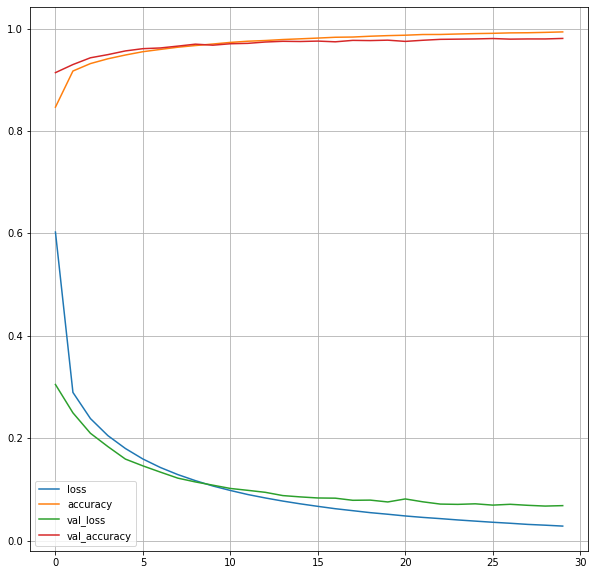

In [49]:

data.plot(figsize = (10, 10))
plt.grid(visible = True)
plt.show()

In [50]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9781


[0.07259350270032883, 0.9781000018119812]

In [53]:
X_test.shape[0]/32
# 32 is the default batch size resulting in total number of batch

312.5

In [52]:
10000/32


312.5

In [ ]:
# if you have less memory in computer you should decrease the batch size to evaluate less number of parameter in once 


In [54]:
model_clf.save('test.h5')

In [55]:
new_model = tf.keras.models.load_model('/content/test.h5')

In [56]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 ouputLayer (Dense)          (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [57]:
new_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9781


[0.07259350270032883, 0.9781000018119812]